In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.rcParams['font.family']       = ['sans-serif']
plt.rcParams['font.sans-serif']   = ['PingFang SC', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline



In [14]:
data1 = pd.read_csv('WorldCupsSummary.csv', encoding='latin1')
data2 = pd.read_csv('WorldCupMatches.csv',  encoding='latin1')
data3 = pd.read_csv('WorldCupPlayers.csv',  encoding='latin1')


In [33]:
data2.head()
data2.info()       
data2.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               900 non-null    int64  
 1   Datetime           900 non-null    object 
 2   Stage              900 non-null    object 
 3   Stadium            900 non-null    object 
 4   City               900 non-null    object 
 5   Hometeamname       900 non-null    object 
 6   Hometeamgoals      900 non-null    int64  
 7   Awayteamgoals      900 non-null    int64  
 8   Awayteamname       900 non-null    object 
 9   Winconditions      841 non-null    object 
 10  Attendance         900 non-null    int64  
 11  Halftimehomegoals  900 non-null    int64  
 12  Halftimeawaygoals  900 non-null    int64  
 13  Referee            900 non-null    object 
 14  Assistant1         900 non-null    object 
 15  Assistant2         900 non-null    object 
 16  Roundid            900 non

Year                  0
Datetime              0
Stage                 0
Stadium               0
City                  0
Hometeamname          0
Hometeamgoals         0
Awayteamgoals         0
Awayteamname          0
Winconditions        59
Attendance            0
Halftimehomegoals     0
Halftimeawaygoals     0
Referee               0
Assistant1            0
Assistant2            0
Roundid               0
Matchid               0
Hometeaminitials      0
Awayteaminitials      0
latitude              8
longitude             8
koppen_code          20
koppen_desc          36
dtype: int64

Match counts per World Cup year:
Year
1930    18
1934    17
1938    18
1950    22
1954    26
1958    35
1962    32
1966    32
1970    32
1974    38
1978    38
1982    52
1986    52
1990    52
1994    52
1998    64
2002    64
2006    64
2010    64
2014    64
2018    64
Name: count, dtype: int64

Year with most matches: 1998 (64 matches)
Year with least matches: 1934 (17 matches)
'Year' column has been processed and saved to WorldCupMatches.csv


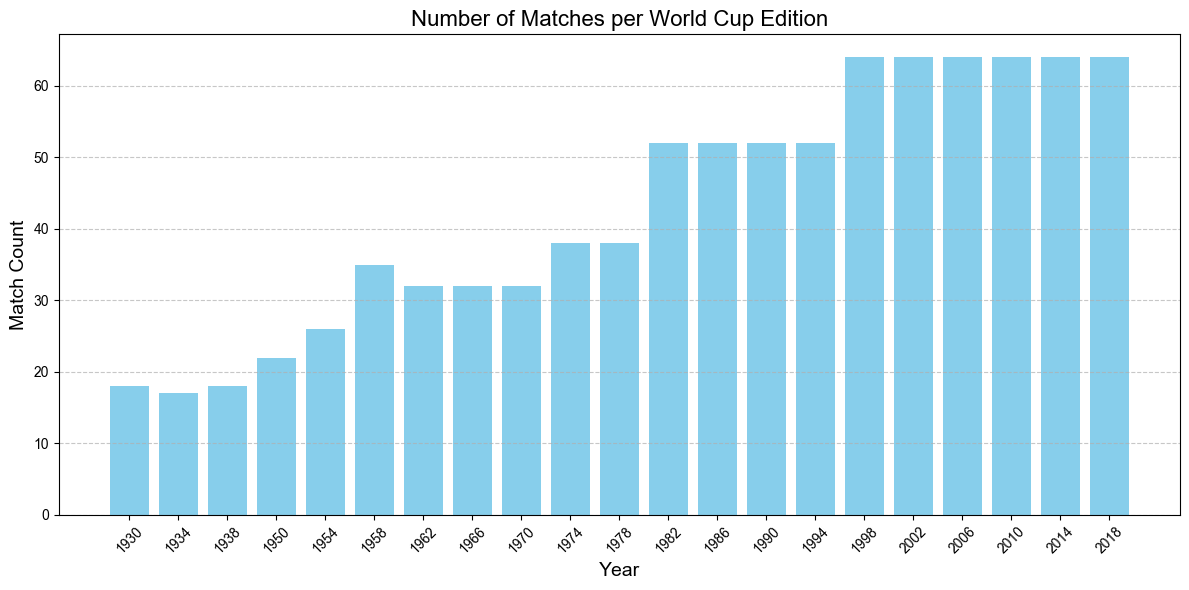

In [32]:
yearly_counts = data2['Year'].value_counts().sort_index()
print("Match counts per World Cup year:")
print(yearly_counts)

if not yearly_counts.empty:
    most_matches_year = yearly_counts.idxmax()
    least_matches_year = yearly_counts.idxmin()
    print(f"\nYear with most matches: {most_matches_year} ({yearly_counts.max()} matches)")
    print(f"Year with least matches: {least_matches_year} ({yearly_counts.min()} matches)")
else:
    print("No Year data found after processing.")

data2.to_csv('WorldCupMatches.csv', index=False)
print(f"'Year' column has been processed and saved to WorldCupMatches.csv")

if not yearly_counts.empty:
    plt.figure(figsize=(12, 6))
    plt.bar(yearly_counts.index.astype(str), yearly_counts.values, color="skyblue")
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Match Count", fontsize=14)
    plt.title("Number of Matches per World Cup Edition", fontsize=16)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for plotting the match trend.")


In [15]:
data1.head()
data1.info()       
data1.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             21 non-null     int64 
 1   HostCountry      21 non-null     object
 2   Winner           21 non-null     object
 3   Second           21 non-null     object
 4   Third            21 non-null     object
 5   Fourth           21 non-null     object
 6   GoalsScored      21 non-null     int64 
 7   QualifiedTeams   21 non-null     int64 
 8   MatchesPlayed    21 non-null     int64 
 9   Attendance       21 non-null     int64 
 10  HostContinent    21 non-null     object
 11  WinnerContinent  21 non-null     object
dtypes: int64(5), object(7)
memory usage: 2.1+ KB


Year               0
HostCountry        0
Winner             0
Second             0
Third              0
Fourth             0
GoalsScored        0
QualifiedTeams     0
MatchesPlayed      0
Attendance         0
HostContinent      0
WinnerContinent    0
dtype: int64

Text(0, 0.5, 'Matches Played')

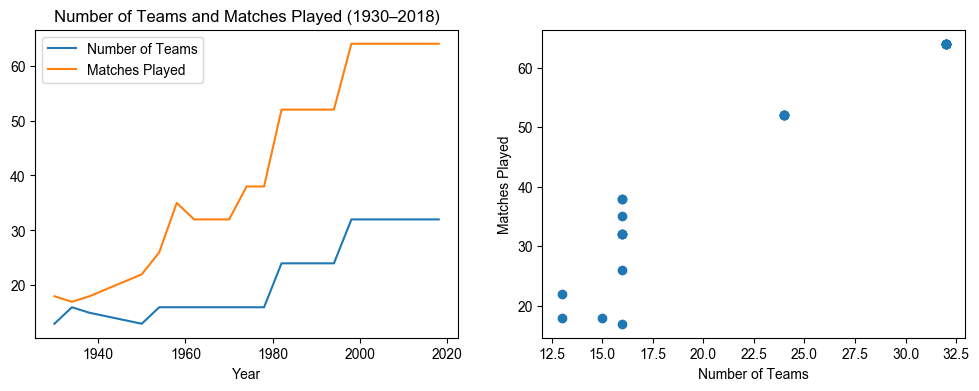

In [16]:

plt.figure(figsize=(12, 4))

plt.subplot(121)
# Plot line chart
plt.plot(data1['Year'], data1['QualifiedTeams'], label='Number of Teams')
plt.plot(data1['Year'], data1['MatchesPlayed'], label='Matches Played')

plt.legend()
plt.title('Number of Teams and Matches Played (1930–2018)')
plt.xlabel('Year')

plt.subplot(122)
plt.scatter(x=data1['QualifiedTeams'], y=data1['MatchesPlayed'])
plt.xlabel('Number of Teams')
plt.ylabel('Matches Played')


In [34]:
data3.head()
data3.info()       
data3.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64